In [2]:
# This is for me to see some results
# Afterwards I can continue working on the metrics

import anndata as ad
import matplotlib.pyplot as plt

# Load the training and test datasets
train_data = ad.read_h5ad("resources/neurips-2023-data/de_train.h5ad")
test_data = ad.read_h5ad("resources/neurips-2023-data/de_test.h5ad")

# Inspect the dataset
print(train_data)
print(test_data)

AnnData object with n_obs × n_vars = 402 × 5317
    obs: 'sm_cell_type', 'cell_type', 'sm_name', 'sm_lincs_id', 'SMILES', 'split', 'control'
    uns: 'dataset_description', 'dataset_id', 'dataset_name', 'dataset_organism', 'dataset_reference', 'dataset_summary', 'dataset_url', 'single_cell_obs'
    layers: 'AveExpr', 'B', 'P.Value', 'adj.P.Value', 'clipped_sign_log10_pval', 'is_de', 'is_de_adj', 'logFC', 'sign_log10_adj_pval', 'sign_log10_pval', 't'
AnnData object with n_obs × n_vars = 151 × 5317
    obs: 'sm_cell_type', 'cell_type', 'sm_name', 'sm_lincs_id', 'SMILES', 'split', 'control'
    uns: 'dataset_description', 'dataset_id', 'dataset_name', 'dataset_organism', 'dataset_reference', 'dataset_summary', 'dataset_url', 'single_cell_obs'
    layers: 'AveExpr', 'B', 'P.Value', 'adj.P.Value', 'clipped_sign_log10_pval', 'is_de', 'is_de_adj', 'logFC', 'sign_log10_adj_pval', 'sign_log10_pval', 't'


cell_type
B cells          76
Myeloid cells    75
NK cells          0
T cells           0
Name: count, dtype: int64


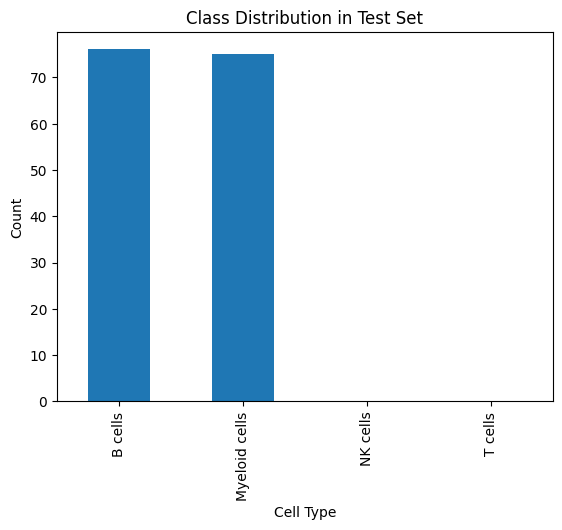

In [3]:
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt

# Load the test dataset
test_data = ad.read_h5ad("resources/neurips-2023-data/de_test.h5ad")

# Inspect the dataset to see if 'cell_type' contains all expected values
print(test_data.obs['cell_type'].value_counts())

# Plot the distribution of the cell types again
test_df = test_data.obs
test_df['cell_type'].value_counts().plot(kind='bar')
plt.title('Class Distribution in Test Set')
plt.xlabel('Cell Type')
plt.ylabel('Count')
plt.show()

cell_type
B cells          76
Myeloid cells    75
NK cells          0
T cells           0
Name: count, dtype: int64
Presence of NK cells: True
Presence of T cells: True


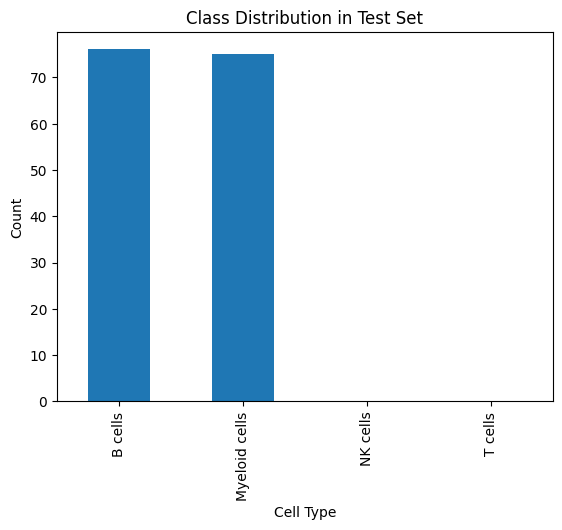

In [4]:
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt

# Load the test dataset
test_data = ad.read_h5ad("resources/neurips-2023-data/de_test.h5ad")

# Inspect the dataset to see if 'cell_type' contains all expected values
cell_type_counts = test_data.obs['cell_type'].value_counts()
print(cell_type_counts)

# Check for the presence of NK cells and T cells
print("Presence of NK cells:", 'NK cells' in cell_type_counts)
print("Presence of T cells:", 'T cells' in cell_type_counts)

# Plot the distribution of the cell types again
cell_type_counts.plot(kind='bar')
plt.title('Class Distribution in Test Set')
plt.xlabel('Cell Type')
plt.ylabel('Count')
plt.show()


In [5]:
import anndata as ad
import pandas as pd
import numpy as np

# Load the test dataset
de_test = ad.read_h5ad("resources/neurips-2023-data/de_test.h5ad")
prediction = ad.read_h5ad("resources/neurips-2023-data/prediction.h5ad")

# Check the data types and values in de_test and prediction
print("Test data layers:", de_test.layers.keys())
print("Prediction data layers:", prediction.layers.keys())

# Display a summary of the test data layer
de_test_layer = de_test.layers['clipped_sign_log10_pval']
print("Test data (de_test) layer 'clipped_sign_log10_pval' sample values:", de_test_layer[:5])

# Display a summary of the prediction data layer
prediction_layer = prediction.layers['prediction']
print("Prediction data (prediction) layer 'prediction' sample values:", prediction_layer[:5])


Test data layers: KeysView(Layers with keys: AveExpr, B, P.Value, adj.P.Value, clipped_sign_log10_pval, is_de, is_de_adj, logFC, sign_log10_adj_pval, sign_log10_pval, t)
Prediction data layers: KeysView(Layers with keys: prediction)
Test data (de_test) layer 'clipped_sign_log10_pval' sample values: [[-0.52850667  0.24346334 -0.48398929 ...  0.65982249 -0.42219462
  -0.80416339]
 [ 0.58408597  0.10431728  0.35712372 ... -0.22886176  0.0465521
   0.03286351]
 [-1.07745211  0.16441154 -0.63428746 ...  0.80672742  1.33693766
   0.14416988]
 [-0.05271227 -0.00886887 -0.25956633 ... -0.08199404  0.29162655
   0.88554668]
 [-0.6952212   0.26320267 -0.17093314 ...  1.78359498 -0.57548307
   0.23385624]]
Prediction data (prediction) layer 'prediction' sample values: [[-0.53754148  0.12605356 -0.17448767 ... -0.02954012  0.02580794
  -0.26973363]
 [-0.53754148  0.12605356 -0.17448767 ... -0.02954012  0.02580794
  -0.26973363]
 [-0.3096843  -0.39947898 -0.07589014 ... -0.95914996 -0.02919354
  -0

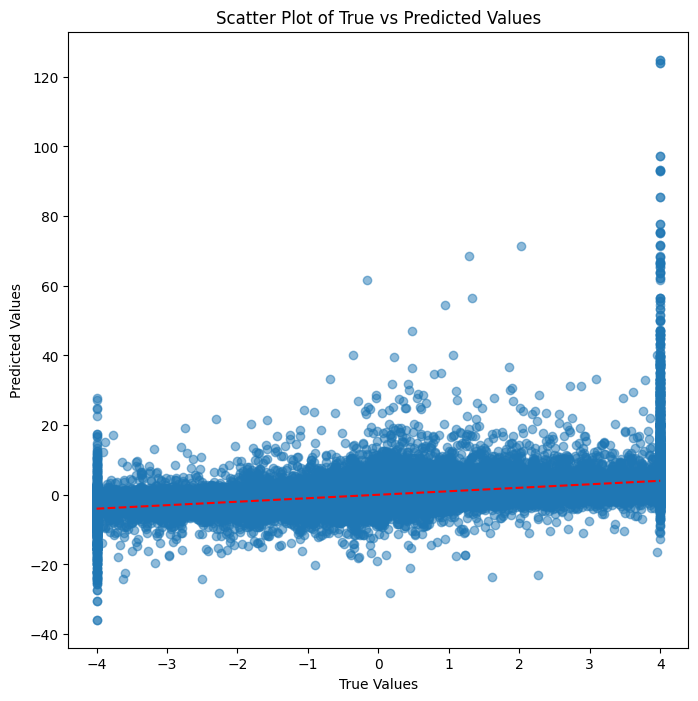

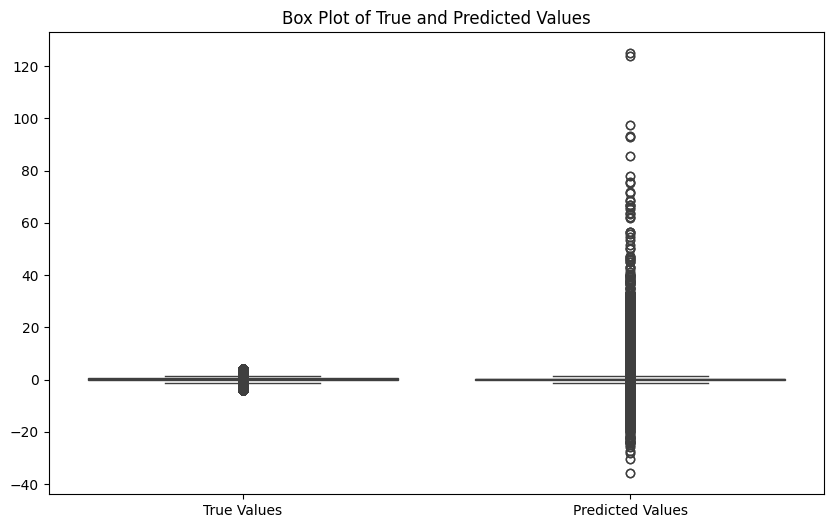

In [6]:
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the test dataset
de_test = ad.read_h5ad("resources/neurips-2023-data/de_test.h5ad")
prediction = ad.read_h5ad("resources/neurips-2023-data/prediction.h5ad")

# Extract the data layers
de_test_layer = de_test.layers['clipped_sign_log10_pval']
prediction_layer = prediction.layers['prediction']

# Flatten the arrays for easier plotting
de_test_values = de_test_layer.flatten()
prediction_values = prediction_layer.flatten()

# Remove NaN values if they exist
de_test_values = de_test_values[~np.isnan(de_test_values)]
prediction_values = prediction_values[~np.isnan(prediction_values)]

# 1. Scatter Plot of True vs Predicted Values
plt.figure(figsize=(8, 8))
plt.scatter(de_test_values, prediction_values, alpha=0.5)
plt.plot([de_test_values.min(), de_test_values.max()], [de_test_values.min(), de_test_values.max()], 'r--')
plt.title('Scatter Plot of True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# 2. Box Plot of True and Predicted Values
plt.figure(figsize=(10, 6))
data = pd.DataFrame({'True Values': de_test_values, 'Predicted Values': prediction_values})
sns.boxplot(data=data)
plt.title('Box Plot of True and Predicted Values')
plt.show()


In [7]:
# Calculate the residuals
residuals = np.abs(de_test_values - prediction_values)

# Calculate the 95th percentile of the residuals
delta = np.percentile(residuals, 95)

print("Chosen delta value (95th percentile):", delta)

# Implement Huber Loss using the calculated delta
def huber_loss(y_true, y_pred, delta):
    residual = y_true - y_pred
    condition = np.abs(residual) <= delta
    squared_loss = 0.5 * (residual ** 2)
    linear_loss = delta * (np.abs(residual) - 0.5 * delta)
    return np.where(condition, squared_loss, linear_loss)

# Calculate Huber Loss
huber_loss_values = huber_loss(de_test_values, prediction_values, delta)
average_huber_loss = np.mean(huber_loss_values)
print(huber_loss_values)
print(average_huber_loss)

Chosen delta value (95th percentile): 2.2692022471356514
[4.08138692e-05 6.89252881e-03 4.78956261e-02 ... 1.00023425e-02
 2.70976802e-04 8.87438993e-02]
0.5810848637317785


In [8]:
# Load the AnnData object
prediction = ad.read_h5ad("resources/neurips-2023-data/prediction.h5ad")

# Check available layers
print(prediction.layers.keys())

# Convert the 'prediction' layer to a DataFrame
prediction_layer = prediction.layers['prediction']
prediction_df = pd.DataFrame(prediction_layer)

# Display the first few rows to verify
print(prediction_df.head())

KeysView(Layers with keys: prediction)
       0         1         2         3         4         5         6     \
0 -0.537541  0.126054 -0.174488  0.009183 -0.432336 -0.001198 -1.035528   
1 -0.537541  0.126054 -0.174488  0.009183 -0.432336 -0.001198 -1.035528   
2 -0.309684 -0.399479 -0.075890 -0.503075  0.271126 -0.131869 -0.045542   
3 -0.309684 -0.399479 -0.075890 -0.503075  0.271126 -0.131869 -0.045542   
4  0.047280 -0.300903  0.336575 -0.092684  0.246448 -0.269924  0.049598   

       7         8         9     ...      5307      5308      5309      5310  \
0  0.196697  0.560520  0.135457  ...  0.059425 -0.085006 -0.142036  0.346545   
1  0.196697  0.560520  0.135457  ...  0.059425 -0.085006 -0.142036  0.346545   
2  0.186314  0.329539 -0.147409  ... -0.049238 -0.271266  0.369542 -0.179048   
3  0.186314  0.329539 -0.147409  ... -0.049238 -0.271266  0.369542 -0.179048   
4  0.629910  0.288994 -0.205262  ... -0.285131 -0.048410  0.838640 -0.075136   

       5311      5312      53

In [9]:
import anndata as ad

# Define the path to the output file
output_file = "output.h5ad"

# Load the output file
output = ad.read_h5ad(output_file)

# Function to print AnnData object details
def print_anndata_details(adata):
    print("AnnData object details:")
    print("Shape:", adata.shape)

    # Print uns (unstructured annotations)
    if len(adata.uns) > 0:
        print("\nUnstructured annotations (uns):")
        for key, value in adata.uns.items():
            print(f"{key}: {value}")
    else:
        print("\nUnstructured annotations (uns): Empty")

# Print all details of the AnnData object
print_anndata_details(output)


AnnData object details:
Shape: (0, 0)

Unstructured annotations (uns):
dataset_id: neurips-2023-data
method_id: mean_across_compounds
metric_ids: ['mean_rowwise_rmse' 'mean_rowwise_mae']
metric_values: [1.16419812 0.74558792]
something


In [11]:
# Define the path to the output file
output_file = "output.h5ad"

# Load the output file
output = ad.read_h5ad(output_file)

# Function to print AnnData object details
def print_anndata_details(adata):
    print("AnnData object details:")
    print("Shape:", adata.shape)

    # Print uns (unstructured annotations)
    if len(adata.uns) > 0:
        print("\nUnstructured annotations (uns):")
        for key, value in adata.uns.items():
            print(f"{key}: {value}")
    else:
        print("\nUnstructured annotations (uns): Empty")

# Print all details of the AnnData object
print_anndata_details(output)

print('something')


AnnData object details:
Shape: (0, 0)

Unstructured annotations (uns):
dataset_id: neurips-2023-data
method_id: mean_across_compounds
metric_ids: ['mean_rowwise_rmse' 'mean_rowwise_mae' 'mean_rowwise_huber']
metric_values: [1.16419812 0.74558792 0.58036472]
something
